In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from pylab import rcParams
rcParams['figure.figsize'] = 13, 4

In [2]:
from google.colab import files
uploaded = files.upload()
df = uploaded
df = pd.read_csv('air_dataset_time.csv')
df.head()

Saving air_dataset_time.csv to air_dataset_time.csv


,Datetime,CO(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,PT08_feat,Datetime.1
0,2004-03-10 18:00:00,2.6,11.9,166.0,1056.0,113.0,13.6,48.9,1341.50,2004-03-10 18:00:00
1,2004-03-10 19:00:00,2.0,9.4,103.0,1174.0,92.0,13.3,47.7,1194.50,2004-03-10 19:00:00
2,2004-03-10 20:00:00,2.2,9.0,131.0,1140.0,114.0,11.9,54.0,1242.25,2004-03-10 20:00:00
3,2004-03-10 21:00:00,2.2,9.2,172.0,1092.0,122.0,11.0,60.0,1277.75,2004-03-10 21:00:00
4,2004-03-10 22:00:00,1.6,6.5,131.0,1205.0,116.0,11.2,59.6,1177.00,2004-03-10 22:00:00


In [3]:
df.set_index('Datetime',inplace= True)

In [4]:
ts = df['T']['2004-06-21':'2004-09-20']
ts = np.array(ts)

In [5]:
ts

array([ 9.77685155,  9.77685155,  9.77685155, ..., 24.7       ,
       23.6       , 22.7       ])

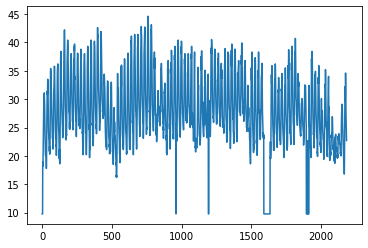

In [6]:
plt.plot(ts)
plt.show()

In [7]:
!pip install tslearn

     |████████████████████████████████| 778kB 5.6MB/s 


In [8]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.piecewise import SymbolicAggregateApproximation

In [9]:
ts = ts.reshape(1,-1) # Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts)

In [10]:
# SAX transform
n_paa_segments = 180
n_sax_symbols = 11
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_ts_inv = sax.inverse_transform(ts_sax)

In [11]:
sax_ts_inv.ravel()

array([-1.69062163, -1.69062163, -1.69062163, ...,  0.        ,
        0.        ,  0.        ])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

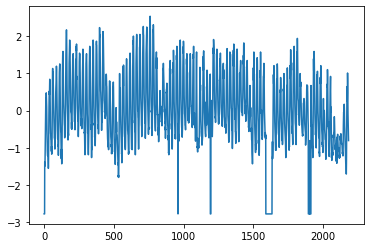

In [12]:
plt.plot(ts.flatten())
plt.savefig("t.png")
files.download("t.png") 
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

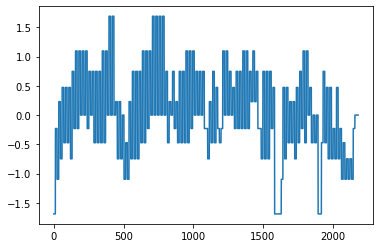

In [13]:
plt.plot(sax_ts_inv.ravel())
plt.savefig("t1.png")
files.download("t1.png") 
plt.show()

In [14]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_ts_inv.ravel()))}
map_symbols

{-1.6906216295848977: 0,
 -1.0968035620935135: 1,
 -0.7478585947633022: 2,
 -0.4727891209922674: 3,
 -0.22988411757923205: 4,
 0.0: 5,
 0.2298841175792322: 6,
 0.4727891209922672: 7,
 0.7478585947633022: 8,
 1.0968035620935135: 9,
 1.6906216295848986: 10}

In [15]:
seq = np.array([map_symbols[v] for v in sax_ts_inv.ravel()]) #new seq
seq

array([0, 0, 0, ..., 5, 5, 5])

In [16]:
len(seq)

2184

# Sequential Pattern Mining

In [17]:
!pip install prefixspan

  Created wheel for prefixspan: filename=prefixspan-0.5.2-cp36-none-any.whl size=11219 sha256=aa123e0bcff452dc645c41bfdce3d3beb5629c8299bfce523211153265efce90
  Stored in directory: /root/.cache/pip/wheels/31/73/e2/681c2d81b43389e5c8532de53dffc444304367c903026d4ba0
  Created wheel for extratools: filename=extratools-0.8.2.1-cp36-none-any.whl size=28868 sha256=b2fec460b2904559d36caf8770668643c2425cb04af63d98a36972fcc475a675
  Stored in directory: /root/.cache/pip/wheels/54/b8/e5/6ae8626c4b1543fecdcf15ead7e78bdf7ab7d42ee2076cb56b
Successfully built prefixspan extratools


In [18]:
from prefixspan import PrefixSpan

In [19]:
sax_ts_inv.ravel()

array([-1.69062163, -1.69062163, -1.69062163, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
new = ts_sax.reshape(12,15)

In [21]:
new

array([[ 0,  4,  1,  6,  2,  7,  3,  7,  3,  7,  2,  8,  4,  9,  4],
       [ 9,  5,  9,  5,  9,  4,  8,  5,  8,  3,  8,  3,  8,  3,  9],
       [ 3,  9,  5, 10,  5, 10,  5,  6,  2,  6,  2,  5,  1,  3,  1],
       [ 6,  2,  8,  2,  8,  2,  8,  3,  9,  3,  9,  4,  9,  5, 10],
       [ 5, 10,  5, 10,  5, 10,  5,  8,  3,  6,  5,  8,  4,  6,  3],
       [ 8,  3,  8,  3,  9,  3,  9,  4,  9,  5,  8,  5,  8,  5,  8],
       [ 4,  4,  2,  6,  3,  8,  3,  7,  4,  3,  4,  9,  5,  9,  5],
       [ 8,  5,  7,  4,  8,  4,  8,  4,  9,  4,  9,  4,  8,  6,  9],
       [ 6,  8,  4,  4,  2,  8,  2,  8,  2,  8,  4,  7,  0,  0,  0],
       [ 0,  1,  7,  2,  7,  3,  6,  3,  6,  2,  7,  3,  8,  4,  9],
       [ 3,  9,  5,  7,  3,  5,  3,  5,  0,  0,  3,  8,  3,  7,  2],
       [ 7,  2,  4,  2,  7,  2,  4,  1,  3,  1,  2,  1,  2,  1,  4]])

In [22]:
ps = PrefixSpan(new)

In [23]:
sorted(ps.frequent(5),reverse = True) #min support,         #(support, element)

[(10, [8]),
 (10, [4]),
 (10, [3]),
 (9, [9]),
 (9, [3, 3]),
 (8, [8, 4]),
 (8, [6]),
 (8, [5]),
 (8, [3, 9]),
 (8, [2]),
 (7, [8, 9]),
 (7, [7]),
 (7, [4, 9]),
 (7, [3, 8]),
 (7, [3, 4]),
 (6, [9, 5]),
 (6, [8, 8]),
 (6, [8, 5]),
 (6, [8, 4, 9]),
 (6, [8, 3]),
 (6, [6, 8, 4]),
 (6, [6, 8]),
 (6, [6, 4]),
 (6, [6, 3]),
 (6, [5, 5]),
 (6, [4, 8]),
 (6, [3, 5]),
 (6, [3, 3, 9]),
 (6, [2, 4]),
 (6, [2, 3]),
 (6, [2, 2]),
 (5, [9, 9]),
 (5, [9, 5, 5]),
 (5, [9, 4]),
 (5, [9, 3]),
 (5, [8, 8, 8]),
 (5, [8, 8, 4]),
 (5, [8, 3, 3]),
 (5, [7, 4]),
 (5, [7, 3]),
 (5, [6, 9]),
 (5, [6, 2]),
 (5, [5, 8]),
 (5, [5, 5, 5]),
 (5, [4, 4, 4]),
 (5, [4, 4]),
 (5, [4, 3]),
 (5, [3, 9, 5]),
 (5, [3, 8, 9]),
 (5, [3, 8, 4]),
 (5, [3, 8, 3]),
 (5, [3, 4, 9]),
 (5, [3, 3, 8]),
 (5, [3, 3, 4, 9]),
 (5, [3, 3, 4]),
 (5, [3, 3, 3]),
 (5, [3, 2]),
 (5, [2, 8, 4]),
 (5, [2, 8]),
 (5, [2, 7]),
 (5, [2, 3, 4]),
 (5, [2, 2, 4])]

In [24]:
sorted(ps.frequent(4, closed=True),reverse=True) #pattern with the highest support which is not contained in any other

[(10, [8]),
 (10, [4]),
 (10, [3]),
 (9, [9]),
 (9, [3, 3]),
 (8, [8, 4]),
 (8, [6]),
 (8, [5]),
 (8, [3, 9]),
 (8, [2]),
 (7, [8, 9]),
 (7, [7]),
 (7, [4, 9]),
 (7, [3, 8]),
 (7, [3, 4]),
 (6, [9, 5]),
 (6, [8, 8]),
 (6, [8, 5]),
 (6, [8, 4, 9]),
 (6, [8, 3]),
 (6, [6, 8, 4]),
 (6, [6, 3]),
 (6, [5, 5]),
 (6, [4, 8]),
 (6, [3, 5]),
 (6, [3, 3, 9]),
 (6, [2, 4]),
 (6, [2, 3]),
 (6, [2, 2]),
 (5, [9, 9]),
 (5, [9, 5, 5]),
 (5, [9, 4]),
 (5, [9, 3]),
 (5, [8, 8, 8]),
 (5, [8, 8, 4]),
 (5, [8, 3, 3]),
 (5, [7, 4]),
 (5, [7, 3]),
 (5, [6, 9]),
 (5, [6, 2]),
 (5, [5, 8]),
 (5, [5, 5, 5]),
 (5, [4, 4, 4]),
 (5, [4, 3]),
 (5, [3, 9, 5]),
 (5, [3, 8, 9]),
 (5, [3, 8, 4]),
 (5, [3, 8, 3]),
 (5, [3, 3, 8]),
 (5, [3, 3, 4, 9]),
 (5, [3, 3, 4]),
 (5, [3, 3, 3]),
 (5, [3, 2]),
 (5, [2, 8, 4]),
 (5, [2, 7]),
 (5, [2, 3, 4]),
 (5, [2, 2, 4]),
 (4, [9, 9, 5]),
 (4, [9, 9, 4, 9]),
 (4, [9, 8]),
 (4, [9, 5, 5, 5]),
 (4, [8, 9, 9]),
 (4, [8, 9, 4]),
 (4, [8, 8, 9]),
 (4, [8, 8, 8, 8]),
 (4, [8, 8, 3]),
 

In [25]:
ps.topk(10) 

[(10, [3]),
 (10, [4]),
 (10, [8]),
 (9, [3, 3]),
 (9, [9]),
 (8, [2]),
 (8, [3, 9]),
 (8, [5]),
 (8, [6]),
 (8, [8, 4])]

In [26]:
ps.topk(10, closed=True)

[(10, [3]),
 (10, [4]),
 (10, [8]),
 (9, [3, 3]),
 (9, [9]),
 (8, [2]),
 (8, [3, 9]),
 (8, [5]),
 (8, [6]),
 (8, [8, 4])]

In [27]:
for i in range(2,22):
    print(i,"=",len(ps.frequent(i, closed = True)))

2 = 436
3 = 243
4 = 119
5 = 57
6 = 29
7 = 15
8 = 10
9 = 5
10 = 3
11 = 0
12 = 0
13 = 0
14 = 0
15 = 0
16 = 0
17 = 0
18 = 0
19 = 0
20 = 0
21 = 0


In [28]:
for i in range(2,16):
    l = 0
    for j in ps.frequent(i, closed = True):
        if len(j[1]) > 1:  #se l'elemento è composto da più di un evento
            l = l+1
    print(i,'=',l)

2 = 426
3 = 233
4 = 109
5 = 49
6 = 21
7 = 7
8 = 3
9 = 1
10 = 0
11 = 0
12 = 0
13 = 0
14 = 0
15 = 0


In [41]:
for i in range(2,11):
    l = 0
    for j in ps.frequent(i, closed = True):
        if len(j[1]) == 3:   #se l'elemento è composto da più di due eventi
            l = l+1
        if i == 6:
          print(j[1])
    print(i,'=',l)

2 = 93
3 = 81
4 = 48
5 = 19
[4]
[4, 8]
[4, 9]
[6]
[6, 3]
[6, 8, 4]
[2]
[2, 3]
[2, 2]
[2, 4]
[7]
[3]
[3, 3]
[3, 3, 9]
[3, 8]
[3, 4]
[3, 9]
[3, 5]
[8]
[8, 4]
[8, 4, 9]
[8, 9]
[8, 5]
[8, 8]
[8, 3]
[9]
[9, 5]
[5]
[5, 5]
6 = 3
7 = 0
8 = 0
9 = 0
10 = 0


In [42]:
for i in range(2,15):
    l = 0
    for j in ps.frequent(i, closed = True):
        if len(j[1]) == 4:  
            l = l+1
        if i == 5:
            print(j[1])
    print(i,'=',l)

2 = 106
3 = 72
4 = 20
[4]
[4, 3]
[4, 8]
[4, 4, 4]
[4, 9]
[6]
[6, 2]
[6, 3]
[6, 8, 4]
[6, 9]
[2]
[2, 7]
[2, 3]
[2, 3, 4]
[2, 2]
[2, 2, 4]
[2, 8, 4]
[2, 4]
[7]
[7, 3]
[7, 4]
[3]
[3, 3]
[3, 3, 8]
[3, 3, 4]
[3, 3, 4, 9]
[3, 3, 9]
[3, 3, 3]
[3, 2]
[3, 8]
[3, 8, 4]
[3, 8, 9]
[3, 8, 3]
[3, 4]
[3, 9]
[3, 9, 5]
[3, 5]
[8]
[8, 4]
[8, 4, 9]
[8, 9]
[8, 5]
[8, 8]
[8, 8, 8]
[8, 8, 4]
[8, 3]
[8, 3, 3]
[9]
[9, 4]
[9, 5]
[9, 5, 5]
[9, 9]
[9, 3]
[5]
[5, 5]
[5, 5, 5]
[5, 8]
5 = 1
6 = 0
7 = 0
8 = 0
9 = 0
10 = 0
11 = 0
12 = 0
13 = 0
14 = 0


In [38]:
for i in range(2,15):
    l = 0
    for j in ps.frequent(i, closed = True):
        if len(j[1]) == 5:   #se l'elemento è composto da più di tre eventi
            l = l+1
            if i == 4:
              print(j[1])
    print(i,'=',l)

2 = 73
3 = 28
[6, 3, 3, 4, 9]
[2, 3, 3, 4, 9]
4 = 2
5 = 0
6 = 0
7 = 0
8 = 0
9 = 0
10 = 0
11 = 0
12 = 0
13 = 0
14 = 0


In [32]:
for i in range(2,15):
    l = 0
    for j in ps.frequent(i, closed = True):
        if len(j[1]) == 6:   #se l'elemento è composto da più di tre eventi
            l = l+1
    print(i,'=',l)

2 = 48
3 = 7
4 = 0
5 = 0
6 = 0
7 = 0
8 = 0
9 = 0
10 = 0
11 = 0
12 = 0
13 = 0
14 = 0


In [33]:
for i in range(2,15):
    l = 0
    for j in ps.frequent(i, closed = True):
        if len(j[1]) == 7:   #se l'elemento è composto da più di tre eventi
            l = l+1
    print(i,'=',l)

2 = 31
3 = 0
4 = 0
5 = 0
6 = 0
7 = 0
8 = 0
9 = 0
10 = 0
11 = 0
12 = 0
13 = 0
14 = 0


In [34]:
for i in range(2,15):
    l = 0
    for j in ps.frequent(i, closed = True):
        if len(j[1]) == 8:   #se l'elemento è composto da più di tre eventi
            l = l+1
    print(i,'=',l)

2 = 15
3 = 0
4 = 0
5 = 0
6 = 0
7 = 0
8 = 0
9 = 0
10 = 0
11 = 0
12 = 0
13 = 0
14 = 0


In [35]:
for i in range(2,15):
    l = 0
    for j in ps.frequent(i, closed = True):
        if len(j[1]) == 9:   #se l'elemento è composto da più di tre eventi
            l = l+1
    print(i,'=',l)

2 = 10
3 = 0
4 = 0
5 = 0
6 = 0
7 = 0
8 = 0
9 = 0
10 = 0
11 = 0
12 = 0
13 = 0
14 = 0


In [36]:
for i in range(2,15):
    l = 0
    for j in ps.frequent(i, closed = True):
        if len(j[1]) == 10:   #se l'elemento è composto da più di tre eventi
            l = l+1
            print(j[1])
    print(i,'=',l)

[0, 1, 2, 7, 3, 7, 3, 8, 4, 9]
[0, 1, 2, 7, 3, 3, 7, 8, 4, 9]
[0, 1, 2, 7, 3, 3, 2, 8, 4, 9]
2 = 3
3 = 0
4 = 0
5 = 0
6 = 0
7 = 0
8 = 0
9 = 0
10 = 0
11 = 0
12 = 0
13 = 0
14 = 0
